In [ ]:
The relevant environmental features were also extracted
from OSM by looking at the elements’ tags, namely: 1)
Tourism features, which relate to landmarks and sites that
attract tourists (e.g., museums), and also tourism-related
facilities (e.g., hotels); 2) Amenity features, which cover
an assortment of community facilities, such as banks and
post offices; 3) Aesthetic features, which relate to places
like parks and gardens; and, 4) Transportation features,
presenting bus and train stations. Another feature that is
taken into account relates to time, which examines the
traffic flow according to the hour-of-day.
The features retrieved from the OSM vect

In [1]:
import osmnx as ox

import networkx as nx

import pandas as pd

/Users/intra26/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
from shapely.geometry import Point,Polygon

from shapely.geometry import shape

In [5]:
import geopandas as gpd

In [3]:
def get_points(lat, long):
    return[ Point (j,i) for i, j in zip(lat, long)]

def get_gdf(df, geometry, crs):
    return gpd.GeoDataFrame(df, geometry=geometry, crs='epsg:%s'%str(crs))


### Цель : Динамически размечать дороги Москвы на 3 типа : 
   >не рекомендуется для самоката
   
   >до 15 км,
   
   >до 25 км

Входные параметры поездки: 
    
  - Участок дороги (пока квадрат)
  - Промежуток времени
  - День недели
  - опыт поездок на самокате

In [ ]:
user_exp_list = ['1','2-5','5+']
weekday_list = ['weekday','weekend']
timeshift_list = ['7-11','11-18','18-21','22-6']
# виджеты

### Граф дорог
    
    - граф с osm с типом дороги
    - скоростные ограничения
    - ширина тротуара, длина участка

In [6]:
#граф дорог
gdf_ws = gpd.read_file('/Users/intra26/Documents/данные москвы/streets_ws.geojson')

#добавить руками ширину

In [292]:
gdf_ws.head()

,osmid1,mean,max,median,highway,geometry
0,100010674,75.634615,75.634615,75.634615,tertiary,"LINESTRING (37.58381 55.68649, 37.58396 55.686..."
1,100024125,43.745673,43.745673,43.745673,secondary,"LINESTRING (37.83701 55.74375, 37.83976 55.74388)"
2,100114743,81.777644,85.043269,81.777644,residential,"LINESTRING (37.60312 55.76858, 37.60367 55.768..."
3,100130471,64.112821,76.200962,67.915865,secondary,"LINESTRING (37.43730 55.86592, 37.43695 55.865..."
4,100130473,79.535096,79.535096,79.535096,residential,"LINESTRING (37.45388 55.83474, 37.45378 55.834..."


In [43]:
gdf_speedlimit= gpd.read_file('gdf_speedlimit.geojson')

### Препятствия:
 - автобусные остановки +
 - мусорки +
 - туалетные модули +
 - фонарные столбы +
 - рекламные щиты +
 - киоски и 
 - дорожные работы на пешеходной части
    

In [7]:
gdf_obstacles = gpd.read_file('/Users/intra26/Documents/данные москвы/gdf_obstacles_1.geojson')

### Основные точки притяжения потоков :
   - транспортные узлы: метро, жд
   - места работы: БЦ
   - места отдыха: парки, шопинг-центры
   - туристические объекты

In [57]:
# инфраструктура
df_infra=gpd.read_file('/Users/intra26/Documents/данные москвы/moscow_insfrastructure.geojson')  # скрипт osm_infrastr

['rail', 'ped_area', 'park',
         'metro',  'mall']

['rail', 'ped_area', 'park', 'metro', 'mall']

In [69]:
df_park_shopping = df_infra[df_infra['Caption'].isin(['mall','park'])]

In [70]:
df_park_shopping.shape

(940, 3)

In [71]:
df_park_shopping.head()

,global_id,Caption,geometry
5552,688502828,park,POINT (37.47893 55.81937)
5553,688502931,park,POINT (37.56163 55.87569)
5554,688503128,park,POINT (37.52306 55.83992)
5555,688503260,park,POINT (37.41341 55.79086)
5556,688504274,park,POINT (37.46565 55.71246)


In [60]:
df_rail= df_infra[df_infra.Caption=='rail']

In [65]:
df_rail.head()

,global_id,Caption,geometry
0,1058611508,rail,POINT (37.58166 55.77684)
1,1058611738,rail,POINT (37.65638 55.77352)
2,1058611993,rail,POINT (37.63260 55.79258)
3,1058612845,rail,POINT (37.65734 55.77672)
4,1058613060,rail,POINT (37.65500 55.77664)


In [135]:
gdf_metro_buf= gpd.read_file('/Users/intra26/Documents/данные москвы/gdf_metro_buf.geojson', driver='GeoJSON')

In [148]:
gdf_metro_buf.columns

Index(['weight', 'Name', 'Name_fin', 'geometry'], dtype='object')

In [157]:
gdf_metro_buf['rank'] = gdf_metro_buf.groupby('Name')['weight'].rank(ascending=False)

In [163]:
gdf_metro_buf = gdf_metro_buf.reset_index()
gdf_metro_buf.rename(columns={'index':'index_mbuf'},inplace=True)

In [143]:
gdf_bc_capacity['ped_ph_morning']= gdf_bc_capacity['pedestrians']/2
gdf_bc_capacity['ped_ph_evening']= gdf_bc_capacity['pedestrians']/4

In [144]:
gdf_bc_capacity

,name,addr:street,building:levels,capacity,pedestrians,geometry,ped_ph_morning,ped_ph_evening
0,None,12-я Парковая улица,5,1000.0,700.0,"POLYGON ((37.81016 55.79052, 37.80989 55.79052...",350.0,175.0
1,None,улица Академика Павлова,5,1000.0,700.0,"POLYGON ((37.40707 55.74855, 37.40726 55.74846...",350.0,175.0
2,None,Ленинградский проспект,2,400.0,280.0,"POLYGON ((37.54130 55.79271, 37.54165 55.79255...",140.0,70.0
3,Бета-центр,Алтуфьевское шоссе,2,400.0,280.0,"POLYGON ((37.58093 55.84878, 37.58092 55.84843...",140.0,70.0
4,Комплекс «Федерация» - Европа,Пресненская набережная,63,12600.0,8820.0,"POLYGON ((37.53679 55.74971, 37.53671 55.74961...",4410.0,2205.0
...,...,...,...,...,...,...,...,...
1475,None,None,1,200.0,140.0,"POLYGON ((37.66198 55.79595, 37.66196 55.79588...",70.0,35.0
1476,None,Измайловский проезд,1,200.0,140.0,"POLYGON ((37.76573 55.79786, 37.76573 55.79800...",70.0,35.0
1477,None,None,1,200.0,140.0,"POLYGON ((37.59866 55.78328, 37.59843 55.78325...",70.0,35.0
1478,Центр информационных технологий Центрального б...,улица Свободы,25,5000.0,3500.0,"POLYGON ((37.44844 55.85126, 37.44850 55.85112...",1750.0,875.0


In [68]:
#df_stations = pd.concat([df_rail,gdf_metro[['global_id','Caption','geometry']]])

In [176]:
gdf_bc_capacity = gdf_bc_capacity.reset_index()
gdf_bc_capacity.rename(columns={'index':'index_bc'},inplace=True)

In [177]:


gdf_bc_capacity['800m_buffer'] =gdf_bc_capacity.to_crs('epsg:32637')['geometry'].buffer(800)

gdf_bc_metro = gpd.sjoin(gdf_bc_capacity.set_geometry('800m_buffer'),gdf_metro_buf.to_crs('epsg:32637'), op='intersects', how='left' )

gdf_bc_metro = gdf_bc_metro.merge(gdf_metro_buf[['index_mbuf','geometry']], on='index_mbuf', suffixes=('_bc','_metro'))



In [180]:
gdf_bc_metro.index_bc.value_counts()[gdf_bc_metro.index_bc.value_counts()==3]

364     3
1383    3
1391    3
254     3
605     3
       ..
407     3
686     3
690     3
538     3
231     3
Name: index_bc, Length: 244, dtype: int64

In [182]:
def dist_2fields(g):
    """calculate distance without changing crs.
    As input it accepts Series, usually row of 2 values
    """
    pass
    try:
        return g.iloc[0].distance(g.iloc[1])
    except:
        return 0

In [183]:
gdf_bc_metro['geometry_metro_32637'] = gdf_bc_metro.set_geometry('geometry_metro').to_crs('epsg:32637')['geometry_metro']

gdf_bc_metro['geometry_bc_32637'] = gdf_bc_metro.set_geometry('geometry_bc').to_crs('epsg:32637')['geometry_bc']

In [187]:
gdf_bc_metro['dist']= gdf_bc_metro[['geometry_bc_32637','geometry_metro_32637']].apply(lambda x:dist_2fields(x)+100, axis=1)


In [188]:
gdf_bc_metro[gdf_bc_metro.index_bc==364]

,index_bc,name,addr:street,building:levels,capacity,pedestrians,geometry_bc,ped_ph_morning,ped_ph_evening,800m_buffer,index_right,index_mbuf,weight,Name,Name_fin,rank,geometry_metro,geometry_metro_32637,geometry_bc_32637,dist
3349,364,"РОДП ""Яблоко""",Пятницкая улица,3,600.0,420.0,"POLYGON ((37.62871 55.74028, 37.62871 55.74026...",210.0,105.0,"POLYGON ((413630.432 6177272.813, 413619.641 6...",163.0,163.0,1.0,"Третьяковская, вход-выход 2 в вестибюль",Третьяковская,1.0,"POLYGON ((37.62880 55.74072, 37.62879 55.74054...","POLYGON ((413912.701 6178074.336, 413911.738 6...","POLYGON ((413905.866 6178025.591, 413905.774 6...",100.000000
3436,364,"РОДП ""Яблоко""",Пятницкая улица,3,600.0,420.0,"POLYGON ((37.62871 55.74028, 37.62871 55.74026...",210.0,105.0,"POLYGON ((413630.432 6177272.813, 413619.641 6...",240.0,240.0,1.0,"Новокузнецкая, вход-выход 1 из вестибюля",Новокузнецкая,1.0,"POLYGON ((37.63279 55.74234, 37.63278 55.74216...","POLYGON ((414166.436 6178249.658, 414165.473 6...","POLYGON ((413905.866 6178025.591, 413905.774 6...",104.611612
3728,364,"РОДП ""Яблоко""",Пятницкая улица,3,600.0,420.0,"POLYGON ((37.62871 55.74028, 37.62871 55.74026...",210.0,105.0,"POLYGON ((413630.432 6177272.813, 413619.641 6...",136.0,136.0,1.0,"Полянка, вход-выход 1 в вестибюль",Полянка,1.0,"POLYGON ((37.62181 55.73685, 37.62180 55.73667...","POLYGON ((413465.086 6177652.141, 413464.123 6...","POLYGON ((413905.866 6178025.591, 413905.774 6...",635.885494


#### model assumptions

In [191]:
alpha=1.2
beta =2

In [ ]:
число людей на этаже в БЦ =300
% пользующихся общ транспортом = 70%
длительность часа пик : 70
длительность

#### Gravity model - сколько людей перетекает из БЦ к метро

In [192]:
gdf_bc_metro['gr_mod_nominator'] = (gdf_bc_metro['weight']**alpha)*(gdf_bc_metro['dist']**(-beta))

In [193]:
gdf_bc_metro['gr_mod_denominator'] = gdf_bc_metro.groupby('index_bc')['gr_mod_nominator'].transform('sum')

In [195]:
gdf_bc_metro['prob_bc_metro'] =  gdf_bc_metro['gr_mod_nominator']/gdf_bc_metro['gr_mod_denominator']

In [199]:
gdf_bc_metro['ped_bc_metro_morning'] = gdf_bc_metro['prob_bc_metro']*gdf_bc_metro['ped_ph_morning']
gdf_bc_metro['ped_bc_metro_evening'] = gdf_bc_metro['prob_bc_metro']*gdf_bc_metro['ped_ph_evening']

In [ ]:
Gravity model

Простой вариант:
    
входы метро на расстоянии 800 м, потом дистанцию между каждым внутри 

In [209]:
gdf_bc_metro.to_csv('gdf_bc_metro.csv')

In [16]:
gdf_bc_metro=pd.read_csv('gdf_bc_metro.csv')

In [20]:
from shapely import wkt

import osmnx as ox

import numpy as np

In [21]:
for col in gdf_bc_metro.columns:
    if 'geometry' in col:
        gdf_bc_metro[col]=gdf_bc_metro[col].apply(lambda x: wkt.loads(x))

### Загружаем дорожный граф из OSM

In [8]:
g_mos_walk=ox.graph_from_place('Moscow', network_type='walk', simplify=True)

#

# g_mos_pr=ox.project_graph(g_mos_walk, to_crs='epsg:32637')

In [14]:
# df_nodes = pd.DataFrame(dict(g_mos_walk.nodes.items())).T

df_nodes['geometry']= get_points(df_nodes.y, df_nodes.x)



gdf_nodes=gpd.GeoDataFrame(df_nodes, crs='epsg:4326', geometry='geometry')

In [22]:
gdf_bc_metro = gpd.GeoDataFrame(gdf_bc_metro).set_geometry('geometry_bc')

In [ ]:
def get_node(x):
    n=0.0001
    c=0
    while c==0 or n>0.001:
        c=gdf_nodes[gdf_nodes.geometry.intersects(x.buffer(n))].shape[0]
        if c >0:
            return gdf_nodes[gdf_nodes.geometry.intersects(x.buffer(n))].iloc[0].name
        else:
            n+=0.0001
        print(n)
    return None
        

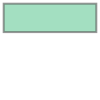

In [27]:
gdf_bc_metro

### Поиск ближайших нод

In [276]:
gdf_bc_metro['bc_node'] = gdf_bc_metro['geometry_bc'].apply(lambda x:get_node(x))
                           

0.0002
0.00030000000000000003
0.0004
0.0002
0.00030000000000000003
0.0004
0.0005
0.0002
0.00030000000000000003
0.0004
0.0005
0.0006000000000000001
0.0007000000000000001
0.0002
0.00030000000000000003
0.0004
0.0002
0.00030000000000000003
0.0002
0.00030000000000000003
0.0002
0.00030000000000000003
0.0002
0.00030000000000000003
0.0004
0.0005
0.0006000000000000001
0.0007000000000000001
0.0008000000000000001
0.0009000000000000002
0.0002
0.00030000000000000003
0.0004
0.0005
0.0006000000000000001
0.0007000000000000001
0.0008000000000000001
0.0009000000000000002
0.0002
0.0002
0.0002
0.0002
0.0002
0.00030000000000000003
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.00030000000000000003
0.0004
0.0005
0.0002
0.0002
0.00030000000000000003
0.0004
0.0002
0.00030000000000000003
0.0004
0.0002
0.0002
0.0002
0.00030000000000000003
0.0002
0.00030000000000000003
0.0002
0.0002
0.00030000000000000003
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.00030000000000000003
0.0004
0.0005
0.0002
0.00030000000000000003
0.

0.0002
0.00030000000000000003
0.0004
0.0005
0.0006000000000000001
0.0007000000000000001
0.0008000000000000001
0.0009000000000000002
0.0010000000000000002
0.0011000000000000003
0.0012000000000000003
0.0013000000000000004
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.00030000000000000003
0.0002
0.00030000000000000003
0.0002
0.00030000000000000003
0.0002
0.0002
0.00030000000000000003
0.0002
0.00030000000000000003
0.0004
0.0002
0.00030000000000000003
0.0002
0.0002
0.00030000000000000003
0.0002
0.0002
0.00030000000000000003
0.0002
0.00030000000000000003
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.00030000000000000003
0.0002
0.00030000000000000003
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.00030000000000000003
0.0002
0.00030000000000000003
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.00030000000000000003
0.0

0.0002
0.00030000000000000003
0.0004
0.0005
0.0002
0.00030000000000000003
0.0004
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.00030000000000000003
0.0004
0.0002
0.00030000000000000003
0.0004
0.0002
0.0002
0.0002
0.0002
0.00030000000000000003
0.0004
0.0005
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.00030000000000000003
0.0002
0.00030000000000000003
0.0002
0.0002
0.0002
0.00030000000000000003
0.0004
0.0002
0.00030000000000000003
0.0004
0.0002
0.0002
0.00030000000000000003
0.0004
0.0002
0.0002
0.0002
0.00030000000000000003
0.0002
0.0002
0.00030000000000000003
0.0002
0.00030000000000000003
0.0004
0.0005
0.0006000000000000001
0.0007000000000000001
0.0002
0.0002
0.0002
0.00030000000000000003
0.0004
0.0002
0.0002
0.0002
0.00030000000000000003
0.0002
0.0002
0.00030000000000000003
0.0002
0.00030000000000000003
0.0004
0.0005
0.0006000000000000001
0.0007000000000000001
0.0002
0.0002
0.00030000000000000003
0.0004
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.000300

0.0005
0.0006000000000000001
0.0007000000000000001
0.0002
0.00030000000000000003
0.0004
0.0005
0.0006000000000000001
0.0002
0.0002
0.00030000000000000003
0.0004
0.0005
0.0006000000000000001
0.0007000000000000001
0.0008000000000000001
0.0009000000000000002
0.0010000000000000002
0.0011000000000000003
0.0012000000000000003
0.0002
0.00030000000000000003
0.0004
0.0005
0.0006000000000000001
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.00030000000000000003
0.0002
0.00030000000000000003
0.0002
0.0002
0.00030000000000000003
0.0004
0.0005
0.0006000000000000001
0.0007000000000000001
0.0008000000000000001
0.0002
0.00030000000000000003
0.0004
0.0005
0.0006000000000000001
0.0007000000000000001
0.0008000000000000001
0.0009000000000000002
0.0002
0.0002
0.00030000000000000003
0.0004
0.0005
0.0006000000000000001
0.0007000000000000001
0.0008000000000000001
0.0002
0.00030000000000000003
0.0004
0.0005
0.0006000000000000001
0.0007000000000000001
0.0008000000000000001
0.0009000000000000002
0.0002
0.000

0.021199999999999927
0.021299999999999927
0.021399999999999926
0.021499999999999925
0.021599999999999925
0.021699999999999924
0.021799999999999924
0.021899999999999923
0.021999999999999922
0.022099999999999922
0.02219999999999992
0.02229999999999992
0.02239999999999992
0.02249999999999992
0.02259999999999992
0.022699999999999918
0.022799999999999918
0.022899999999999917
0.022999999999999916
0.023099999999999916
0.023199999999999915
0.023299999999999915
0.023399999999999914
0.023499999999999913
0.023599999999999913
0.023699999999999912
0.02379999999999991
0.02389999999999991
0.02399999999999991
0.02409999999999991
0.02419999999999991
0.02429999999999991
0.024399999999999908
0.024499999999999907
0.024599999999999907
0.024699999999999906
0.024799999999999905
0.024899999999999905
0.024999999999999904
0.025099999999999904
0.025199999999999903
0.025299999999999902
0.025399999999999902
0.0254999999999999
0.0255999999999999
0.0256999999999999
0.0257999999999999
0.0258999999999999
0.02599999999

In [287]:
gdf_bc_metro['metro_node'] = gdf_bc_metro['geometry_metro'].apply(lambda x:get_node(x))
                           

0.0002
0.00030000000000000003
0.0004
0.0005
0.0006000000000000001
0.0007000000000000001
0.0008000000000000001
0.0009000000000000002
0.0010000000000000002
0.0011000000000000003
0.0012000000000000003
0.0013000000000000004
0.0014000000000000004
0.0015000000000000005
0.0016000000000000005
0.0002
0.00030000000000000003
0.0004
0.0005
0.0006000000000000001
0.0007000000000000001
0.0008000000000000001
0.0009000000000000002
0.0010000000000000002
0.0011000000000000003
0.0012000000000000003
0.0013000000000000004
0.0014000000000000004
0.0015000000000000005
0.0016000000000000005
0.0002
0.00030000000000000003
0.0004
0.0005
0.0006000000000000001
0.0007000000000000001
0.0008000000000000001
0.0009000000000000002
0.0010000000000000002
0.0011000000000000003
0.0012000000000000003
0.0013000000000000004
0.0014000000000000004
0.0015000000000000005
0.0016000000000000005
0.0002
0.00030000000000000003
0.0004
0.0005
0.0006000000000000001
0.0007000000000000001
0.0002
0.00030000000000000003
0.0004
0.0005
0.00060000

In [289]:
gdf_bc_metro['list_nodes'] = gdf_bc_metro[['metro_node','bc_node']].apply(lambda r: ox.shortest_path(g_mos_walk,r['metro_node'],r['bc_node']), axis=1)




In [290]:
gdf_bc_metro['list_nodes'] 

0       [257557585, 4707412473, 4707412486, 3672326252...
1       [257557585, 617227661, 4621576331, 617227660, ...
2       [257557585, 617227661, 4621576331, 617227660, ...
3       [257557585, 617227661, 4621576324, 4621576328,...
4       [257557585, 617227661, 4621576324, 4621576328,...
                              ...                        
4326    [35912046, 2997175901, 2997175912, 2997175902,...
4327    [1415888932, 1415888943, 295885508, 293921861,...
4328    [2575203359, 2595990230, 295886924, 530789284,...
4329    [534639401, 261759639, 1759662541, 1759662543,...
4330    [456728927, 456729015, 2009115763, 6206139647,...
Name: list_nodes, Length: 4331, dtype: object

In [285]:
gdf_bc_metro.head(10)['index_mbuf']

0    139.0
1    139.0
2    139.0
3    139.0
4    139.0
5    139.0
6    138.0
7    138.0
8    138.0
9    114.0
Name: index_mbuf, dtype: float64

In [247]:
df_nodes.set_geometry('geometry')['geometry']

28041755      POINT (37.76482 55.82750)
2239298975    POINT (37.76493 55.82743)
2393697879    POINT (37.76460 55.82768)
4942638663    POINT (37.76716 55.82863)
3907569019    POINT (37.76427 55.82723)
                        ...            
8945223863    POINT (37.64559 55.88210)
8946942067    POINT (37.65357 55.77513)
8949254350    POINT (37.58981 55.65726)
8949254356    POINT (37.59035 55.65760)
8949539073    POINT (37.36099 55.84973)
Name: geometry, Length: 386302, dtype: geometry

In [304]:
gdf_ws.rename(columns={'osmid1':'osmid'}, inplace=True)

In [298]:
nodes, streets = ox.graph_to_gdfs(g_mos_walk)

In [301]:
streets.reset_index(inplace=True)

In [306]:
streets['osmid']=streets['osmid'].astype(str)

In [307]:
gdf_ws['osmid']=gdf_ws['osmid'].astype(str)

mean_ws = gdf_ws['mean'].mean()

gdf_streets_ws = streets.merge(gdf_ws[['osmid','mean']], on=['osmid'], how='left' )

gdf_streets_ws['mean'].fillna(mean_ws,inplace=True)

<AxesSubplot:>

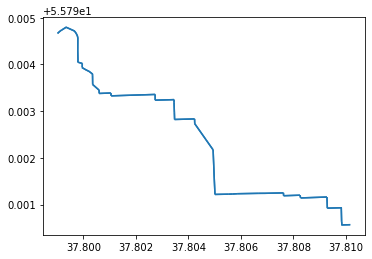

In [324]:
gdf_streets_ws[gdf_streets_ws.u.isin(gdf_bc_metro.iloc[0]['list_nodes'])&gdf_streets_ws.v.isin(gdf_bc_metro.iloc[0]['list_nodes'])].plot()

<AxesSubplot:>

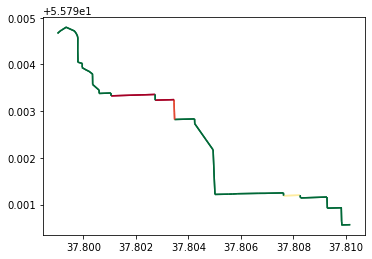

In [338]:
i=0
gdf_roads = gdf_streets_ws[gdf_streets_ws.u.isin(gdf_bc_metro.iloc[i]['list_nodes'])&gdf_streets_ws.v.isin(gdf_bc_metro.iloc[i]['list_nodes'])][['geometry','mean','u','v','osmid','length','highway']]
# gdf_roads.dissolve(,aggfunc='').plot()
gdf_roads.plot(column='mean', cmap='RdYlGn_r')

In [332]:
gdf_roads_full= gpd.GeoDataFrame()
for i in range(gdf_bc_metro.shape[0]):
    gdf_roads = gdf_streets_ws[gdf_streets_ws.u.isin(gdf_bc_metro.iloc[i]['list_nodes'])&gdf_streets_ws.v.isin(gdf_bc_metro.iloc[i]['list_nodes'])][['geometry','mean','u','v','osmid','length','highway']]
    gdf_roads['index_mbuf']=gdf_bc_metro.iloc[i]['index_mbuf']
    gdf_roads['index_bc']=gdf_bc_metro.iloc[i]['index_bc']
    gdf_roads_full=pd.concat([gdf_roads_full,gdf_roads])
    

In [339]:
gdf_roads_full.head()

,geometry,mean,u,v,osmid,length,highway,index_mbuf,index_bc
13180,"LINESTRING (37.79902 55.79466, 37.79905 55.794...",68.844680,257557585,4707412473,23771558,13.019,service,139.0,0
78134,"LINESTRING (37.80270 55.79336, 37.80273 55.79336)",81.508173,570172542,5101642299,83925809,2.101,secondary,139.0,0
78136,"LINESTRING (37.80270 55.79336, 37.80245 55.793...",81.508173,570172542,611559107,83925809,31.397,secondary,139.0,0
88295,"LINESTRING (37.80220 55.79335, 37.80141 55.793...",81.508173,611559107,1921419196,83925809,71.244,secondary,139.0,0
88296,"LINESTRING (37.80220 55.79335, 37.80245 55.793...",81.508173,611559107,570172542,83925809,31.397,secondary,139.0,0


In [341]:
gdf_roads_ms = gdf_roads_full[['index_mbuf','index_bc','geometry']].dissolve(['index_mbuf','index_bc'])#.geometry.buffer()

In [ ]:
gdf_bc_metro


In [ ]:
 # накладываем ограничения ремонтные работы 

In [210]:
gdf_bc_metro.iloc[0]

index_bc                                                                0
name                                                                 None
addr:street                                           12-я Парковая улица
building:levels                                                         5
capacity                                                             1000
pedestrians                                                           700
geometry_bc             POLYGON ((37.8101604 55.7905222, 37.8098943 55...
ped_ph_morning                                                        350
ped_ph_evening                                                        175
800m_buffer             POLYGON ((426193.3188164451 6183417.032890619,...
index_right                                                           139
index_mbuf                                                            139
weight                                                                  2
Name                         Первомайс

In [28]:
def receive_buffer(row):
    x1= row['geometry_bc'].centroid.x
    y1 = row['geometry_bc'].centroid.y
    x2 = row['geometry_metro'].centroid.x
    y2 = row['geometry_metro'].centroid.y
    return Polygon([(x1,y1),(x1,y2),(x2,y2),(x2,y1)])

### Взвешиваем улицы на уровень пешеходности. Это определяет выбор пути человеком

In [29]:
gdf_bc_metro['geometry_buffer'] = gdf_bc_metro.apply(lambda x: receive_buffer(x), axis=1)

In [37]:
gdf_bc_metro.drop(['Unnamed: 0','index_right'], axis=1, inplace=True)

In [40]:
gdf_bc_metro_osmns =gpd.sjoin(gdf_bc_metro.set_geometry('geometry_buffer'),gdf_ws, op='contains' )

<ipython-input-40-1a521c5e4437>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  gdf_bc_metro_osmns =gpd.sjoin(gdf_bc_metro.set_geometry('geometry_buffer'),gdf_ws, op='contains' )


In [43]:
gdf_bc_metro_osmns['ped_percent_road'] = gdf_bc_metro_osmns['mean'] / gdf_bc_metro_osmns.groupby(['index_bc','index_mbuf'])['mean'].transform('sum')

In [45]:
gdf_bc_metro_osmns.columns

Index(['index_bc', 'name', 'addr:street', 'building:levels', 'capacity',
       'pedestrians', 'geometry_bc', 'ped_ph_morning', 'ped_ph_evening',
       '800m_buffer', 'index_mbuf', 'weight', 'Name', 'Name_fin', 'rank',
       'geometry_metro', 'geometry_metro_32637', 'geometry_bc_32637', 'dist',
       'gr_mod_nominator', 'gr_mod_denominator', 'prob_bc_metro',
       'ped_bc_metro_morning', 'ped_bc_metro_evening', 'geometry_buffer',
       'index_right', 'osmid1', 'mean', 'max', 'median', 'highway',
       'ped_percent_road'],
      dtype='object')

In [46]:
gdf_bc_metro_osmns['ped_ph_road_morning']= gdf_bc_metro_osmns['ped_percent_road']*gdf_bc_metro_osmns['ped_bc_metro_morning']
gdf_bc_metro_osmns['ped_ph_road_evening'] = gdf_bc_metro_osmns['ped_percent_road']*gdf_bc_metro_osmns['ped_bc_metro_evening']

In [48]:
gdf_bc_metro_osmns.iloc[0]

index_bc                                                                0
name                                                                  NaN
addr:street                                           12-я Парковая улица
building:levels                                                         5
capacity                                                             1000
pedestrians                                                           700
geometry_bc             POLYGON ((37.8101604 55.7905222, 37.8098943 55...
ped_ph_morning                                                        350
ped_ph_evening                                                        175
800m_buffer             POLYGON ((426193.3188164451 6183417.032890619,...
index_mbuf                                                            139
weight                                                                  2
Name                         Первомайская, вход-выход 3 в южный вестибюль
Name_fin                              

In [51]:
gdf_osmid_people = gdf_bc_metro_osmns.groupby(['osmid1','index_right'])['ped_ph_road_morning','ped_ph_road_evening'].sum()

<ipython-input-51-c254e2697834>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gdf_osmid_people = gdf_bc_metro_osmns.groupby(['osmid1','index_right'])['ped_ph_road_morning','ped_ph_road_evening'].sum()


In [55]:
gdf_osmid_people['ped_ph_road_morning'] = gdf_osmid_people['ped_ph_road_morning'].apply(lambda x: round(x,0)).astype(int)
gdf_osmid_people['ped_ph_road_evening'] = gdf_osmid_people['ped_ph_road_evening'].apply(lambda x: round(x,0)).astype(int)

In [62]:
gdf_osmid_people = gdf_ws.reset_index()[['index','geometry', 'osmid1']].merge(gdf_osmid_people, right_on='index_right', left_on = 'index', how='left')#.fillna().

### Cчитаем число человек на участках дороги

In [72]:
gdf_osmid_people['ped_ph_road_morning'] = gdf_osmid_people['ped_ph_road_morning'].fillna(40)
gdf_osmid_people['ped_ph_road_evening'] = gdf_osmid_people['ped_ph_road_evening'].fillna(20)
                                               
                                                     
                                               
                                               
                                               
                                               
                                               

In [73]:
gdf_osmid_people.to_csv('gdf_osmid_people.csv')

In [91]:
gdf_osmid_people['line_buffer'] = gdf_osmid_people.geometry.buffer(0.0001, 2)

<ipython-input-91-1b64c191d4cd>:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_osmid_people['line_buffer'] = gdf_osmid_people.geometry.buffer(0.0001, 2)


In [85]:
gdf_obstacles.geometry

0        POINT (37.51990 55.80630)
1        POINT (37.57125 55.77182)
2        POINT (37.75255 55.75466)
3        POINT (37.75830 55.75643)
4        POINT (37.74054 55.75880)
                   ...            
28506    POINT (37.44113 55.72752)
28507    POINT (37.43424 55.72760)
28508    POINT (37.43552 55.72744)
28509    POINT (37.44431 55.72733)
28510    POINT (37.63557 55.80199)
Name: geometry, Length: 28511, dtype: geometry

In [93]:
gdf_osmid_people_obst = gpd.sjoin(gdf_osmid_people.set_geometry('line_buffer'),gdf_obstacles, op='intersects', how='left').fillna(0).groupby(['index'])['size_m2'].sum()




In [101]:
# gdf_osmid_people = gdf_osmid_people.merge(gdf_osmid_people_obst.reset_index(), on='index')
gdf_osmid_people['square_street']  = gdf_osmid_people.set_geometry('line_buffer').to_crs('epsg:32637')['line_buffer'].length

In [103]:
gdf_osmid_people

,index,geometry,osmid1,ped_ph_road_morning,ped_ph_road_evening,line_buffer,size_m2,square_street
0,0,"LINESTRING (37.58381 55.68649, 37.58396 55.686...",100010674,40.0,20.0,"POLYGON ((37.58399 55.68654, 37.58430 55.68643...",0.00,143.915924
1,1,"LINESTRING (37.83701 55.74375, 37.83976 55.74388)",100024125,40.0,20.0,"POLYGON ((37.83976 55.74398, 37.83983 55.74395...",0.00,400.876036
2,2,"LINESTRING (37.60312 55.76858, 37.60367 55.768...",100114743,3.0,2.0,"POLYGON ((37.60365 55.76882, 37.60402 55.76892...",0.00,408.948197
3,3,"LINESTRING (37.43730 55.86592, 37.43695 55.865...",100130471,40.0,20.0,"POLYGON ((37.43703 55.86536, 37.43680 55.86499...",0.08,504.355597
4,4,"LINESTRING (37.45388 55.83474, 37.45378 55.834...",100130473,40.0,20.0,"POLYGON ((37.45378 55.83465, 37.45378 55.83465...",2.04,400.977565
...,...,...,...,...,...,...,...,...
18535,18535,"LINESTRING (37.63949 55.58771, 37.63919 55.587...","[ 99478996, 322345759 ]",40.0,20.0,"POLYGON ((37.63916 55.58774, 37.63904 55.58776...",2.12,592.521691
18536,18536,"LINESTRING (37.70181 55.81494, 37.70192 55.814...","[ 9963418, 30133998 ]",40.0,20.0,"POLYGON ((37.70193 55.81504, 37.70274 55.81502...",0.00,1182.123499
18537,18537,"LINESTRING (37.71725 55.81597, 37.71696 55.815...","[ 9963754, 680597934 ]",40.0,20.0,"POLYGON ((37.71701 55.81569, 37.71688 55.81559...",0.00,138.498927
18538,18538,"LINESTRING (37.67032 55.60197, 37.67030 55.601...","[ 99825757, 99825751 ]",40.0,20.0,"POLYGON ((37.67040 55.60187, 37.67038 55.60184...",0.00,115.391655


In [104]:
gdf_osmid_people['place_per_person_morning']=(gdf_osmid_people['square_street'] - gdf_osmid_people['size_m2'])/gdf_osmid_people['ped_ph_road_morning']
gdf_osmid_people['place_per_person_evening']=(gdf_osmid_people['square_street'] - gdf_osmid_people['size_m2'])/gdf_osmid_people['ped_ph_road_evening']

In [107]:
gdf_osmid_people['speed'] = (gdf_osmid_people['place_per_person_morning']*2).apply(lambda x: 15 if x>50 else (25 if x>25 else x ))

In [108]:
gdf_osmid_people.to_csv('gdf_osmid_people_speed.csv')

In [96]:
gdf_osmid_people_obst.set_geometry('line_buffer').to_crs('epsg:32637').area #gdf_osmid_people_obst 

AttributeError: 'Series' object has no attribute 'set_geometry'

In [95]:
gdf_ws

,osmid1,mean,max,median,highway,geometry
0,100010674,75.634615,75.634615,75.634615,tertiary,"LINESTRING (37.58381 55.68649, 37.58396 55.686..."
1,100024125,43.745673,43.745673,43.745673,secondary,"LINESTRING (37.83701 55.74375, 37.83976 55.74388)"
2,100114743,81.777644,85.043269,81.777644,residential,"LINESTRING (37.60312 55.76858, 37.60367 55.768..."
3,100130471,64.112821,76.200962,67.915865,secondary,"LINESTRING (37.43730 55.86592, 37.43695 55.865..."
4,100130473,79.535096,79.535096,79.535096,residential,"LINESTRING (37.45388 55.83474, 37.45378 55.834..."
...,...,...,...,...,...,...
18535,"[ 99478996, 322345759 ]",61.928125,67.979808,61.928125,tertiary,"LINESTRING (37.63949 55.58771, 37.63919 55.587..."
18536,"[ 9963418, 30133998 ]",76.140064,76.812981,75.981731,residential,"LINESTRING (37.70181 55.81494, 37.70192 55.814..."
18537,"[ 9963754, 680597934 ]",70.423317,70.423317,70.423317,tertiary,"LINESTRING (37.71725 55.81597, 37.71696 55.815..."
18538,"[ 99825757, 99825751 ]",65.303365,65.303365,65.303365,tertiary,"LINESTRING (37.67032 55.60197, 37.67030 55.601..."


In [ ]:
Моделируем движение :
    
    
Получаем : 100 человек на 500*1.5 метр = 750, 1 человек на 7.5 кв.м,  комфорт 1 человек на 1.5 кв.м, остается 6 квадратных метра - 

2 сек на торможение, 6/2 = 3 м /c. 3*3600= 10800, 11км /ч 


    

In [ ]:
def calculate_speed( dist to )

In [ ]:
1.Сколько людей, самокатов пройдет на n-ой локации  - гравити модель
2.добавить ограничения из объектов
3. добавить ширину дорог
5. Расчитать оптимальную дистанцию между самокатами
6. Задать ограничение скорости

In [ ]:
Шаг 1. Определить число людей на дорогах:
    Будни 8-11, 18-21 :
        БЦ - метро
        Дом -метро
    Будни: 11-18, 19-23:
        Парки - метро
        Тур объекты - метро
        

In [ ]:
gravitiy model

In [ ]:
размер бц разделить на число станций метро, вокруг с

In [ ]:
Если успеем
https://arxiv.org/pdf/1406.3567.pdf  - моделирование скорости и плотности через клеточные автоматы
    
https://pypi.org/project/cellular-automaton/ 0- библиотека питона 